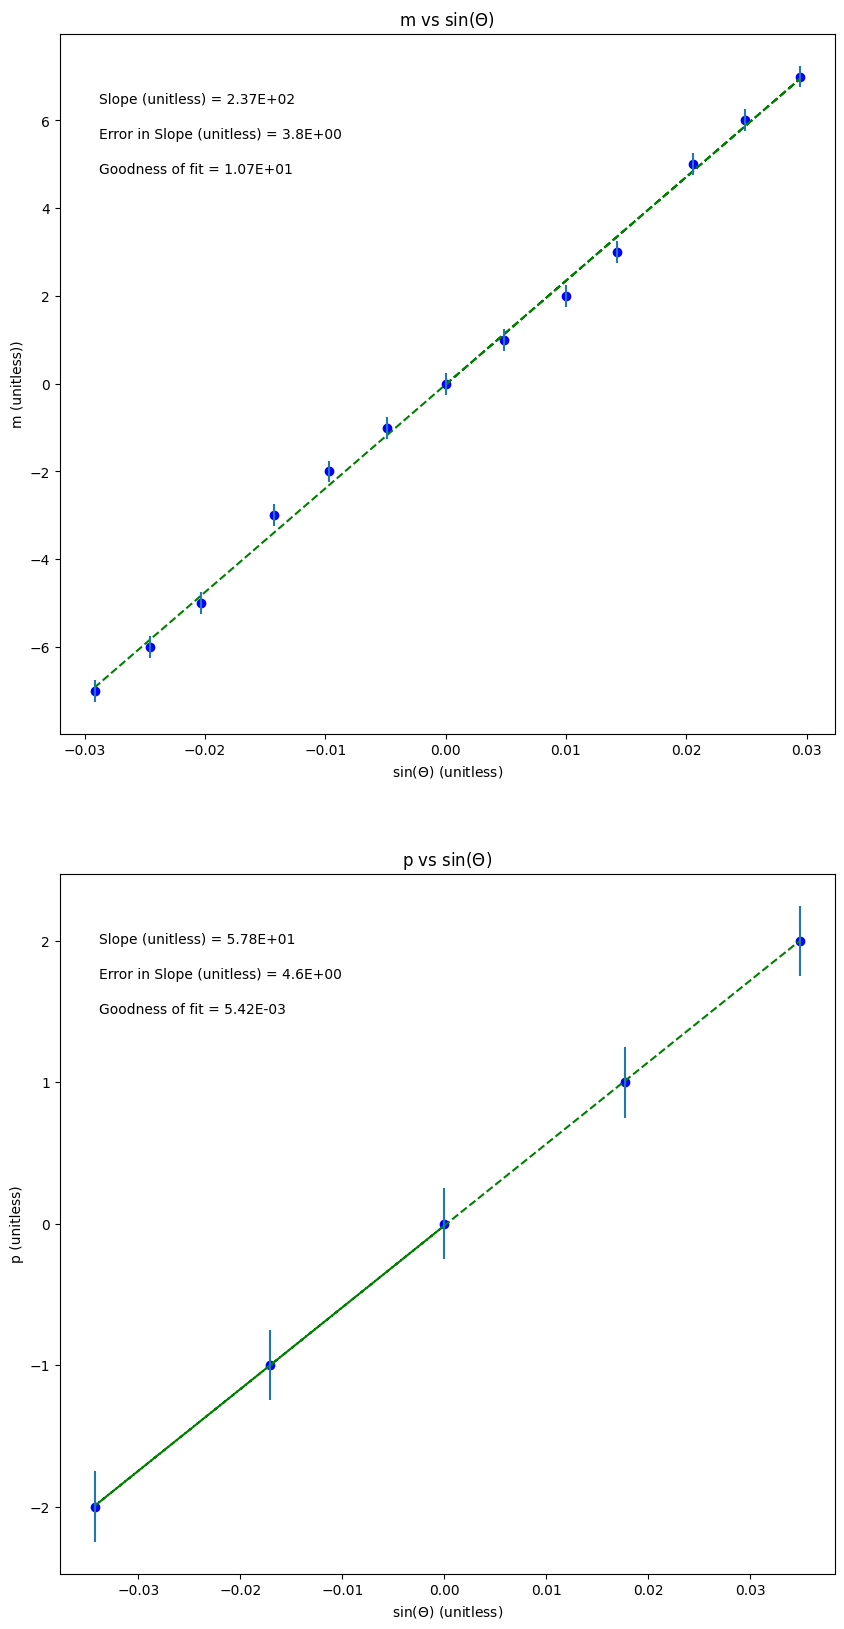

In [9]:
#PHSX 216 & 218 plotting code
#Brianna Beller
#Updated February 2023

#import packages and libraries, assign shortcut names
%matplotlib inline
from __future__ import division #only used if running python 2
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------#
#------------------------------Plot 1 of 3------------------------------#
#-----------------------------------------------------------------------#

#Data Section - Create Arrays for data. Perform necessary calculations.
#CHANGE THE VARIABLE NAMES and numbers to match your data

sin_theta = np.array([0, 0.00485708556369596, 0.00999950003749688, 0.0142842567828501, 0.0205670772060943, 0.0248494670787012, 0.029415836527671, -0.00485708556369596, -0.00971382739103839, -0.0142842567828501, -0.0202815416842584, -0.0245640143658508, -0.0291304894167904]) #what are units?
m = np.array([0, 1, 2, 3, 5, 6, 7, -1, -2, -3, -5, -6, -7]) #what are units?


#-------------------------------------------------------------#
#Create array for uncertainties in y variable
#CHANGE THE VARIABLE NAME and numbers to match your data 

err_m = np.array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])


#-------------------------------------------------------------#
#---------------------Plotting Code Below---------------------#
#-------------------------------------------------------------#

#UPDATE THIS SECTION!!!

#Re-assign variables as x, y, dy so that the remaining plotting code may remain generic
x1 = sin_theta             #this should be the array you want to plot on the x axis
y1 = m             #this should be the array you want to plot on the y axis
dy1 = err_m        #this should be your error in y array


#update each of these 4 strings
plot_title1= 'm vs sin($\Theta$)'
x_label1= 'sin($\Theta$) (unitless)'
y_label1= 'm (unitless))'
slope_units1= 'unitless'

#update annotation placement with integer from 1 to 4, top R corner is 1 (counter-clockwise from there)
annotation_placement1=2 


#-----------------------------------------------------------------------#
#------------------------------Plot 2 of 2------------------------------#
#-----------------------------------------------------------------------#

#Data Section - Create Arrays for data. Perform necessary calculations.
#CHANGE THE VARIABLE NAMES and numbers to match your data

sin_theta2 = np.array([0, -0.0171403387474811, -0.0342655804311415, 0.0177115070329458, 0.0348359860646721]) #what are units?
p = np.array([0, -1, -2, 1, 2]) #what are units?


#-------------------------------------------------------------#
#Create array for uncertainties in y variable
#CHANGE THE VARIABLE NAME and numbers to match your data 

err_p = np.array([0.25, 0.25, 0.25, 0.25, 0.25])


#-------------------------------------------------------------#
#---------------------Plotting Code Below---------------------#
#-------------------------------------------------------------#

#UPDATE THIS SECTION!!!

#Re-assign variables as x, y, dy so that the remaining plotting code may remain generic
x2 = sin_theta2             #this should be the array you want to plot on the x axis
y2 = p             #this should be the array you want to plot on the y axis
dy2 = err_p        #this should be your error in y array


#update each of these 4 strings
plot_title2= 'p vs sin($\Theta$)'
x_label2= 'sin($\Theta$) (unitless)'
y_label2= 'p (unitless)'
slope_units2= 'unitless'

#update annotation placement with integer from 1 to 4, top R corner is 1 (counter-clockwise from there)
annotation_placement2=2 


#------------------------------------------------------------------------#
#-----------Don't need to change anything beyond this point!-------------#
#------------------------------------------------------------------------#

#Find the intercept and slope, b and m, from Python's polynomial fitting function
b1,m1=np.polynomial.polynomial.polyfit(x1,y1,1,w=dy1)
b2,m2=np.polynomial.polynomial.polyfit(x2,y2,1,w=dy2)

#Write the equation for the best fit line based on the slope and intercept
fit1 = b1+m1*x1
fit2 = b2+m2*x2

#Calculate the error in slope and intercept 

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D1=Delta(x1, dy1)
D2=Delta(x2, dy2)

dm1 = np.sqrt(1/D1*sum(1/dy1**2)) #error in slope
dm2 = np.sqrt(1/D2*sum(1/dy2**2)) #error in slope

db1 = np.sqrt(1/D1*sum(x1**2/dy1**2)) #error in intercept
db2 = np.sqrt(1/D2*sum(x2**2/dy2**2)) #error in intercept

#Calculate the "goodness of fit" using linear least squares fitting
#(the closer to 0, the better the fit)
def LLSFD2(x,y,dy,b,m):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N1 = LLSFD2(x1,y1,dy1,b1,m1)
N2 = LLSFD2(x2,y2,dy2,b2,m2)

#assign annotation positions based on annotation_placement value (1/3)
if annotation_placement1==2 or annotation_placement1==3:
    xpos1=0.05
elif annotation_placement1==1 or annotation_placement1==4:
    xpos1=0.75

if annotation_placement1==1 or annotation_placement1==2:
    ypos1=[.9,.85,.8]
elif annotation_placement1==3 or annotation_placement1==4:
    ypos1=[.2,.15,.1]

#assign annotation positions based on annotation_placement value (2/3)
if annotation_placement2==2 or annotation_placement2==3:
    xpos2=0.05
elif annotation_placement2==1 or annotation_placement2==4:
    xpos2=0.75

if annotation_placement2==1 or annotation_placement2==2:
    ypos2=[.9,.85,.8]
elif annotation_placement2==3 or annotation_placement2==4:
    ypos2=[.2,.15,.1]

#-----------------------------------------------------------------------#
#Don't need to change anything in this section!

#Plot data on graph. Plot error bars and place values for slope, 
#error in slope and goodness of fit on the plot using "annotate"


fig,axs=plt.subplots(2,1,figsize=(10,20))

axs[0].plot(x1, fit1, color='green', linestyle='--')
axs[0].scatter(x1, y1, color='blue',marker='o')
axs[0].set_xlabel(x_label1) 
axs[0].set_ylabel(y_label1) 
axs[0].set_title(plot_title1) 

axs[0].errorbar(x1, y1, yerr=dy1, xerr=None, fmt="none") #don't need to plot x error bars
 
axs[0].annotate('Slope ({}) = {value:.{digits}E}'.format(slope_units1,value=m1, digits=2),
             (xpos1, ypos1[0]), xycoords='axes fraction')
 
axs[0].annotate('Error in Slope ({}) = {value:.{digits}E}'.format(slope_units1,value=dm1, digits=1),
             (xpos1, ypos1[1]), xycoords='axes fraction')
 
axs[0].annotate('Goodness of fit = {value:.{digits}E}'.format(value=N1, digits=2),
             (xpos1, ypos1[2]), xycoords='axes fraction')



axs[1].plot(x2, fit2, color='green', linestyle='--')
axs[1].scatter(x2, y2, color='blue',marker='o')
axs[1].set_xlabel(x_label2) 
axs[1].set_ylabel(y_label2) 
axs[1].set_title(plot_title2) 

axs[1].errorbar(x2, y2, yerr=dy2, xerr=None, fmt="none") #don't need to plot x error bars
 
axs[1].annotate('Slope ({}) = {value:.{digits}E}'.format(slope_units2,value=m2, digits=2),
             (xpos2, ypos2[0]), xycoords='axes fraction')
 
axs[1].annotate('Error in Slope ({}) = {value:.{digits}E}'.format(slope_units2,value=dm2, digits=1),
             (xpos2, ypos2[1]), xycoords='axes fraction')
 
axs[1].annotate('Goodness of fit = {value:.{digits}E}'.format(value=N2, digits=2),
             (xpos2, ypos2[2]), xycoords='axes fraction')





plt.show()